# PCA examples

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time

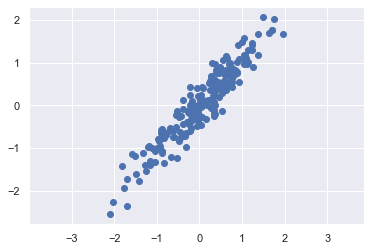

In [24]:
rng = np.random.RandomState(int(time.time()))
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

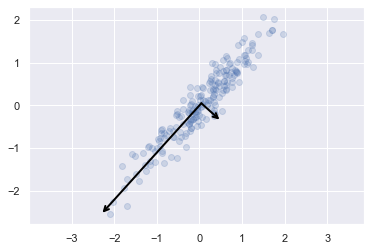

In [26]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0,
                    shrinkB=0,
                    color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [35]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print(X_pca)

original shape:    (200, 2)
transformed shape: (200, 2)
[[-7.69275894e-01  1.07483423e-01]
 [ 2.26703652e+00 -3.20169746e-02]
 [ 1.03339203e+00  3.21178877e-02]
 [-1.27648656e+00 -4.13434661e-02]
 [ 1.11792264e+00 -1.15711003e-01]
 [-3.75637895e-01 -5.43833779e-02]
 [ 6.62954414e-01  2.50765892e-01]
 [-2.50092796e+00  3.32367454e-01]
 [ 2.05550045e+00  1.00948838e-01]
 [-9.30082728e-01  3.05208889e-02]
 [-1.85401567e-01  1.02393438e-01]
 [-6.68867825e-02  2.30631922e-01]
 [ 3.37465992e+00  1.56143385e-01]
 [-9.20482398e-01  1.27558123e-01]
 [-6.23128912e-01  2.28502209e-01]
 [-1.48578623e+00  7.29141038e-02]
 [ 1.96355306e+00 -4.97604696e-03]
 [-1.71911297e+00  3.99061385e-02]
 [-1.59825110e+00 -2.68865719e-01]
 [-9.64645538e-02 -4.48490631e-01]
 [-7.37476994e-01  4.62576767e-02]
 [ 1.55298961e+00 -6.18990220e-02]
 [ 2.62318703e-01  8.22079563e-02]
 [ 1.44899078e+00  6.69042003e-02]
 [-2.09629563e+00 -1.01649366e-01]
 [-2.39055883e+00  8.91453854e-02]
 [-9.32059661e-03  2.36804591e-02]

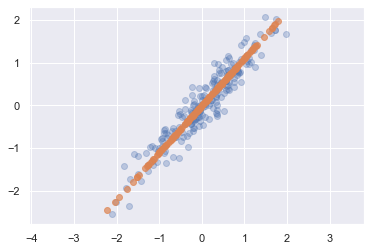

In [28]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.7)
plt.axis('equal');

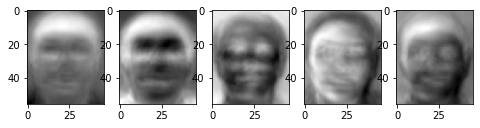

In [10]:
import cv2
import os
import numpy as np
import copy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def normalize(image):
    
    max_value = np.max(image)
    min_value = np.min(image)
    return 255 * ((image - min_value) / (max_value - min_value))

image_folder = "D:/User/Desktop/DLCV/hw1/p2_data"
num_features = 56 * 46

data = np.zeros((10*40, num_features), dtype=np.uint8)
labels = np.zeros(10*40, dtype=np.uint8)

training_data = np.zeros((9*40, num_features), dtype=np.uint8)
training_labels = np.zeros(9*40, dtype=np.uint8)

testing_data = np.zeros((1*40, num_features), dtype=np.uint8)
testing_labels = np.zeros(1*40, dtype=np.uint8)

# Get training and testing data
filenames = sorted(os.listdir(image_folder), key=lambda filename:(int(filename.split("_")[0]), int(filename.split("_")[1].split(".")[0])))
for index, filename in enumerate(filenames):
    data[index, :] = cv2.imread(os.path.join("hw1/p2_data", filename), cv2.IMREAD_GRAYSCALE).flatten()
    labels[index] = int(filename.split("_")[0])
    i = int(filename.split("_")[0])
    j = int(filename.split("_")[1].split(".")[0])
    
    if j == 10:
        testing_data[i-1, :] =  data[index, :]
        testing_labels[i-1]  =  labels[index]
    else:
        training_data[(i-1)*9 + (j-1), :] = data[index, :]
        training_labels[(i-1)*9 + (j-1)]  = labels[index]

# Performing PCA
pca_features = 4
pca = PCA(n_components=pca_features)
pca.fit(training_data)
eigenfaces = np.zeros((pca_features, 56, 46))
for i in range(pca_features):
    eigenfaces[i, :, :] = pca.components_[i].reshape((56, 46))


# Show result
fig = plt.figure(figsize=(8, 8))
for i in range(pca_features):
    fig.add_subplot(1, pca_features+1, i+1)
    plt.imshow(normalize(eigenfaces[i, :, :]), cmap='gray', vmin=0, vmax=255)
    # plt.imshow(eigenfaces[i-1, :, :], cmap='gray', vmin=0, vmax=255)
    cv2.imwrite(f"hw1/results/eigenface_{i+1}.png", normalize(eigenfaces[i, :, :]))

mean_face = np.mean(eigenfaces, axis=0)
fig.add_subplot(1, pca_features+1, 5)
plt.imshow(normalize(mean_face), cmap='gray', vmin=0, vmax=255)
cv2.imwrite(f"hw1/results/meanface.png", normalize(mean_face))

plt.show()




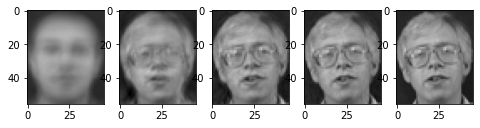

MSE : [7.46799599e+02 2.34948629e+02 4.83950580e+01 1.30346976e+01
 2.15433971e-01]


In [2]:
i = 2 # ith person
j = 1 # jth image
index = [3, 50, 170, 240, 345]
image = data[(i-1)*10 + (j-1), :][:]
mse = np.zeros(len(index))

fig = plt.figure(figsize=(8, 8))
for i in range(len(index)):
    pca = PCA(n_components=index[i])
    pca.fit(training_data)
    image_pca = pca.transform([image])

    # Show result
    fig.add_subplot(1, len(index), i+1)
    reconstructed = pca.inverse_transform(image_pca)
    mse[i] = np.mean(np.square(reconstructed - image))
    plt.imshow(reconstructed.reshape((56, 46)), cmap='gray', vmin=0, vmax=255)
    cv2.imwrite(f"hw1/results/pca_{index[i]}_reconstruct.png", reconstructed.reshape((56, 46)))
plt.show()
print(f"MSE : {mse}")

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
np.set_printoptions(precision=4)

kf = KFold(n_splits=3, shuffle=True)
K = [1, 3, 5]    # hyperparameter of k-nearest neighbors
N = [3, 50, 170] # hyperparameter of pca n_components

pca = None

# Train
    
for n in N:
    pca = PCA(n_components = n)
    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
        scores = []
        for train_index, validation_index in kf.split(training_data):
            
            train = training_data[train_index, :]
            train_labels = training_labels[train_index]
            validation = training_data[validation_index, :]
            validation_labels = training_labels[validation_index]
            
            # Train
            pca.fit(train)
            pca_train = pca.transform(train)
            knn.fit(pca_train, train_labels)
            
            # Predict
            pca_validation = pca.transform(validation)
            scores.append(np.sum(np.equal(knn.predict(pca_validation), validation_labels)) / len(validation_labels))
        print(f"k = {k}, n = {n}, scores : {scores}, average test scores : {np.average(scores)}")


#             knn.fit(pca_train, training_labels)
#             print(knn.predict(pca_test))
#             print(testing_labels)
#             print(len(testing_labels) - np.sum(np.equal(knn.predict(pca_test), testing_labels)))
    
    


k = 1, n = 3, scores : [0.7166666666666667, 0.6, 0.7416666666666667], average test scores : 0.6861111111111112
k = 3, n = 3, scores : [0.5666666666666667, 0.6583333333333333, 0.5333333333333333], average test scores : 0.5861111111111111
k = 5, n = 3, scores : [0.55, 0.5416666666666666, 0.4583333333333333], average test scores : 0.5166666666666667
k = 1, n = 50, scores : [0.9166666666666666, 0.95, 0.925], average test scores : 0.9305555555555557
k = 3, n = 50, scores : [0.9, 0.9166666666666666, 0.9], average test scores : 0.9055555555555556
k = 5, n = 50, scores : [0.7916666666666666, 0.7583333333333333, 0.8333333333333334], average test scores : 0.7944444444444444
k = 1, n = 170, scores : [0.925, 0.9666666666666667, 0.975], average test scores : 0.9555555555555556
k = 3, n = 170, scores : [0.8583333333333333, 0.875, 0.8666666666666667], average test scores : 0.8666666666666667
k = 5, n = 170, scores : [0.775, 0.8083333333333333, 0.8], average test scores : 0.7944444444444446


In [11]:
b = image.flatten().reshape((56, 46))
k = 0
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i, j] != b[i, j]:
            print("123")
        k += 1

IndexError: tuple index out of range

In [17]:
a = np.array([1, 2, 3, 4, 5, 6])
print(a.reshape((3, 2)))

[[1 2]
 [3 4]
 [5 6]]
